<a href="https://colab.research.google.com/github/falahamro/Moral-Foundations-Analysis/blob/main/Sentiment_Analysis_on_the_Candidates_Speech_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on the Candidates Speech Text

In [ ]:
# Import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import json 
import matplotlib.pyplot as plt
import datetime
plt.style.use('fivethirtyeight')

In [ ]:
campaign.head()

,Candidate,Party,Type,Date,Title,Text,clean_text,words,sentences,char_count,...,datetime,clean_speech,total_words,authority/subversion,care/harm,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation,Cluster
0,Jeb Bush,1,1,"June 15, 2015",Remarks Announcing Candidacy for President at ...,Thank you all very much. I always feel welcome...,thank you all very much. i always feel welcome...,"[thank, you, all, very, much, ., i, always, fe...","[thank you all very much., i always feel welco...",12383,...,2015-06-15,"[thank, you, all, very, much, i, always, feel,...",2284,0.175131,0.175131,0.131349,0.000000,0.306480,0.175131,0
1,Jeb Bush,1,1,"July 30, 2015",Remarks to the National Urban League Conferenc...,Thank you all very much. I appreciate your hos...,thank you all very much. i appreciate your hos...,"[thank, you, all, very, much, ., i, appreciate...","[thank you all very much., i appreciate your h...",14457,...,2015-07-30,"[thank, you, all, very, much, i, appreciate, y...",2638,0.303260,0.075815,0.265353,0.000000,0.151630,0.341168,0
2,Jeb Bush,1,1,"August 11, 2015",Remarks at the Ronald Reagan Presidential Libr...,Thank you very much. It's good to be with all ...,thank you very much. it's good to be with all ...,"[thank, you, very, much, ., it, 's, good, to, ...","[thank you very much., it's good to be with al...",21283,...,2015-08-11,"[thank, you, very, much, it, s, good, to, be, ...",3735,0.321285,0.133869,0.026774,0.000000,0.107095,0.133869,0
3,Jeb Bush,1,1,"September 9, 2015","Remarks in Garner, North Carolina",Thank you very much. I appreciate your hospita...,thank you very much. i appreciate your hospita...,"[thank, you, very, much, ., i, appreciate, you...","[thank you very much., i appreciate your hospi...",10049,...,2015-09-09,"[thank, you, very, much, i, appreciate, your, ...",1880,0.159574,0.053191,0.053191,0.000000,0.053191,0.212766,0
4,Jeb Bush,1,1,"November 2, 2015","Remarks in Tampa, Florida",Thank you. It's great to be in Tampa with so m...,thank you. it's great to be in tampa with so m...,"[thank, you, ., it, 's, great, to, be, in, tam...","[thank you., it's great to be in tampa with so...",14189,...,2015-11-02,"[thank, you, it, s, great, to, be, in, tampa, ...",2550,0.313725,0.117647,0.039216,0.039216,0.000000,0.274510,0


https://github.com/joshisak/Social-Media-Network-Analysis/blob/main/Python%20Analysis/Sentiment%20Analysis%20Project.ipynb

In [ ]:
# Function for cleaning the text
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score): # Polarity goes as a score here
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
#campaign = pd.DataFrame(Text['Text'])

campaign['text'] = campaign['Text'].apply(cleanTxt)
campaign['Subjectivity'] = campaign['Text'].apply(getSubjectivity)
campaign['Polarity'] = campaign['Text'].apply(getPolarity)
campaign['Analysis'] = campaign['Polarity'].apply(getAnalysis)
#campaign.head()

In [ ]:
campaign

,Candidate,Party,Type,Date,Title,Text,clean_text,words,sentences,char_count,...,care/harm,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation,Cluster,text,Subjectivity,Polarity,Analysis
0,Jeb Bush,1,1,"June 15, 2015",Remarks Announcing Candidacy for President at ...,Thank you all very much. I always feel welcome...,thank you all very much. i always feel welcome...,"[thank, you, all, very, much, ., i, always, fe...","[thank you all very much., i always feel welco...",12383,...,0.175131,0.131349,0.000000,0.306480,0.175131,0,Thank you all very much. I always feel welcome...,0.456340,0.171087,Positive
1,Jeb Bush,1,1,"July 30, 2015",Remarks to the National Urban League Conferenc...,Thank you all very much. I appreciate your hos...,thank you all very much. i appreciate your hos...,"[thank, you, all, very, much, ., i, appreciate...","[thank you all very much., i appreciate your h...",14457,...,0.075815,0.265353,0.000000,0.151630,0.341168,0,Thank you all very much. I appreciate your hos...,0.449360,0.171919,Positive
2,Jeb Bush,1,1,"August 11, 2015",Remarks at the Ronald Reagan Presidential Libr...,Thank you very much. It's good to be with all ...,thank you very much. it's good to be with all ...,"[thank, you, very, much, ., it, 's, good, to, ...","[thank you very much., it's good to be with al...",21283,...,0.133869,0.026774,0.000000,0.107095,0.133869,0,Thank you very much. It's good to be with all ...,0.490971,0.082839,Positive
3,Jeb Bush,1,1,"September 9, 2015","Remarks in Garner, North Carolina",Thank you very much. I appreciate your hospita...,thank you very much. i appreciate your hospita...,"[thank, you, very, much, ., i, appreciate, you...","[thank you very much., i appreciate your hospi...",10049,...,0.053191,0.053191,0.000000,0.053191,0.212766,0,Thank you very much. I appreciate your hospita...,0.473084,0.138774,Positive
4,Jeb Bush,1,1,"November 2, 2015","Remarks in Tampa, Florida",Thank you. It's great to be in Tampa with so m...,thank you. it's great to be in tampa with so m...,"[thank, you, ., it, 's, great, to, be, in, tam...","[thank you., it's great to be in tampa with so...",14189,...,0.117647,0.039216,0.039216,0.000000,0.274510,0,Thank you. It's great to be in Tampa with so m...,0.470839,0.177264,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Donald Trump,1,1,"November 9, 2016",Remarks in New York City Accepting Election as...,"Thank you. Thank you very much, everyone. [app...","thank you. thank you very much, everyone. [app...","[thank, you, ., thank, you, very, much, ,, eve...","[thank you., thank you very much, everyone., [...",8933,...,0.061125,0.061125,0.061125,0.183374,0.366748,0,"Thank you. Thank you very much, everyone. [app...",0.575021,0.227718,Positive
7389,Scott Walker,1,1,"July 13, 2015",Remarks Announcing Candidacy for President in ...,"I love America.As kids, my brother David and I...","i love america.as kids, my brother david and i...","[i, love, america.as, kids, ,, my, brother, da...","[i love america.as kids, my brother david and ...",16801,...,0.255591,0.063898,0.063898,0.000000,0.191693,0,"I love America.As kids, my brother David and I...",0.443553,0.220471,Positive
7390,Scott Walker,1,1,"September 21, 2015","Remarks in Madison, Wisconsin Announcing the E...","As a kid, I was drawn to Ronald Reagan because...","as a kid, i was drawn to ronald reagan because...","[as, a, kid, ,, i, was, drawn, to, ronald, rea...","[as a kid, i was drawn to ronald reagan becaus...",2952,...,0.000000,0.000000,0.000000,0.000000,0.369686,0,"As a kid, I was drawn to Ronald Reagan because...",0.512199,0.270675,Positive
7391,Scott Walker,1,1,"July 20, 2016",Remarks to the Republican National Convention ...,"My fellow Americans, you have a choice, you de...","my fellow americans, you have a choice, you de...","[my, fellow, americans, ,, you, have, a, choic...","[my fellow americans, you have a choice, you d...",6250,...,0.183486,0.091743,0.091743

In [ ]:
# Is there a negative sentiment?
sent_col = campaign['Analysis']

neg_cond = sent_col == 'Negative'

nega = campaign[neg_cond]

nega.head(10)

,Candidate,Party,Type,Date,Title,Text,clean_text,words,sentences,char_count,...,care/harm,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation,Cluster,text,Subjectivity,Polarity,Analysis
3676,Carly Fiorina,1,1,"May 4, 2015",Video Remarks Announcing Candidacy for President,[Begins with a few seconds of Fiorina watching...,[begins with a few seconds of fiorina watching...,"[[, begins, with, a, few, seconds, of, fiorina...",[[begins with a few seconds of fiorina watchin...,1004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,[Begins with a few seconds of Fiorina watching...,0.360000,-0.060000,Negative
7067,Donald Trump,1,1,"September 17, 2016",Remarks at the Remembrance Project Luncheon at...,"Thanks, Maria, for that introduction, and for ...","thanks, maria, for that introduction, and for ...","[thanks, ,, maria, ,, for, that, introduction,...","[thanks, maria, for that introduction, and for...",7687,...,0.148588,0.000000,0.000000,0.445765,0.520059,0,"Thanks, Maria, for that introduction, and for ...",0.390696,-0.001652,Negative
7097,Donald Trump,1,1,"October 29, 2016",Remarks at the Jeffco Fairgrounds Event Center...,Real change also means getting rid of the corr...,real change also means getting rid of the corr...,"[real, change, also, means, getting, rid, of, ...",[real change also means getting rid of the cor...,4705,...,0.000000,0.000000,0.000000,0.122699,0.000000,0,Real change also means getting rid of the corr...,0.424751,-0.029903,Negative
7098,Donald Trump,1,1,"October 29, 2016",Remarks at the Phoenix Convention Center in Ph...,"The silent majority is back. In 10 days, we ar...","the silent majority is back. in 10 days, we ar...","[the, silent, majority, is, back, ., in, 10, d...","[the silent majority is back., in 10 days, we ...",12205,...,0.140779,0.046926,0.046926,0.093853,0.234632,0,"The silent majority is back. In 10 days, we ar...",0.432289,-0.005470,Negative


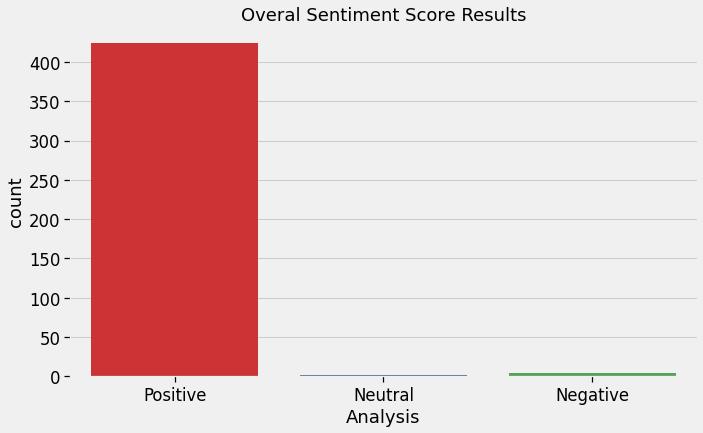

In [ ]:
# Let's visualize the sentiment in our speeches dataset

plt.figure(figsize=(10,6))
sns.set_context(context='notebook', font_scale=1.5)
sns.countplot(campaign['Analysis'], palette = 'Set1')
plt.title('Overal Sentiment Score Results');

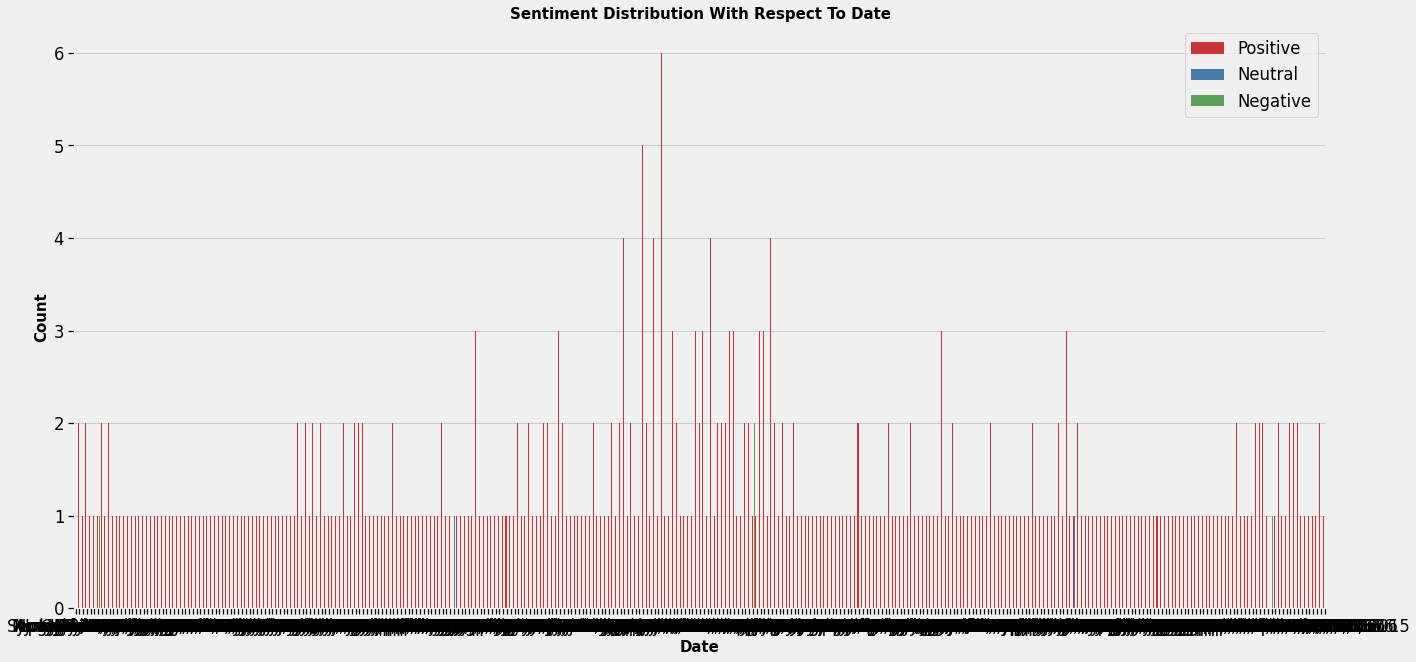

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(campaign['Date'], hue=campaign['Analysis'], palette = 'Set1')
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Date', fontsize=15, fontweight='bold')
plt.title('Sentiment Distribution With Respect To Date', fontsize=15, fontweight='bold')
plt.show()

Calculating a new sentiment score for each candidate using the agg function over pos, neg, and net. 

In [ ]:
# First, we need to find the number of pos, neg, and neut for each speech 
# change pos to 1, neg to -1, and neut to 0
campaign['Analysis'] = campaign['Analysis'].replace(['Positive', 'Negative', 'Neutral'], ['1', '-1', '0'])
campaign.head()

,Candidate,Party,Type,Date,Title,Text,clean_text,words,sentences,char_count,...,care/harm,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation,Cluster,text,Subjectivity,Polarity,Analysis
0,Jeb Bush,1,1,"June 15, 2015",Remarks Announcing Candidacy for President at ...,Thank you all very much. I always feel welcome...,thank you all very much. i always feel welcome...,"[thank, you, all, very, much, ., i, always, fe...","[thank you all very much., i always feel welco...",12383,...,0.175131,0.131349,0.000000,0.306480,0.175131,0,Thank you all very much. I always feel welcome...,0.456340,0.171087,1
1,Jeb Bush,1,1,"July 30, 2015",Remarks to the National Urban League Conferenc...,Thank you all very much. I appreciate your hos...,thank you all very much. i appreciate your hos...,"[thank, you, all, very, much, ., i, appreciate...","[thank you all very much., i appreciate your h...",14457,...,0.075815,0.265353,0.000000,0.151630,0.341168,0,Thank you all very much. I appreciate your hos...,0.449360,0.171919,1
2,Jeb Bush,1,1,"August 11, 2015",Remarks at the Ronald Reagan Presidential Libr...,Thank you very much. It's good to be with all ...,thank you very much. it's good to be with all ...,"[thank, you, very, much, ., it, 's, good, to, ...","[thank you very much., it's good to be with al...",21283,...,0.133869,0.026774,0.000000,0.107095,0.133869,0,Thank you very much. It's good to be with all ...,0.490971,0.082839,1
3,Jeb Bush,1,1,"September 9, 2015","Remarks in Garner, North Carolina",Thank you very much. I appreciate your hospita...,thank you very much. i appreciate your hospita...,"[thank, you, very, much, ., i, appreciate, you...","[thank you very much., i appreciate your hospi...",10049,...,0.053191,0.053191,0.000000,0.053191,0.212766,0,Thank you very much. I appreciate your hospita...,0.473084,0.138774,1
4,Jeb Bush,1,1,"November 2, 2015","Remarks in Tampa, Florida",Thank you. It's great to be in Tampa with so m...,thank you. it's great to be in tampa with so m...,"[thank, you, ., it, 's, great, to, be, in, tam...","[thank you., it's great to be in tampa with so...",14189,...,0.117647,0.039216,0.039216,0.000000,0.274510,0,Thank you. It's great to be in Tampa with so m...,0.470839,0.177264,1


In [ ]:
def pos(x):
    if x['Analysis'] == 2:
        return 2
    else:
        return 0
def neut(x):
    if x['Analysis'] == 1:
        return 1
    else:
        return 0
def neg(x):
    if x['Analysis'] == 0:
        return 0
    else:
        return 0

campaign.apply(pos, axis=1)
campaign.apply(neut, axis=1)
campaign.apply(neg, axis=1)


campaign['Positive'] = campaign.apply(pos, axis=1)
campaign['Negative'] = campaign.apply(neg, axis=1)
campaign['Neutral'] = campaign.apply(neut, axis=1)

In [ ]:
campaign['total_len'] = campaign['Text'].map(lambda x: len(x))
campaign['Final_Sentiment'] = round((campaign['Positive'] - campaign['Negative']) / campaign['total_len'], 2)

In [ ]:
campaign

,Candidate,Party,Type,Date,Title,Text,clean_text,words,sentences,char_count,...,Cluster,text,Subjectivity,Polarity,Analysis,Positive,Negative,Neutral,total_len,Final_Sentiment
0,Jeb Bush,1,1,"June 15, 2015",Remarks Announcing Candidacy for President at ...,Thank you all very much. I always feel welcome...,thank you all very much. i always feel welcome...,"[thank, you, all, very, much, ., i, always, fe...","[thank you all very much., i always feel welco...",12383,...,0,Thank you all very much. I always feel welcome...,0.456340,0.171087,1,0,0,0,12383,0.0
1,Jeb Bush,1,1,"July 30, 2015",Remarks to the National Urban League Conferenc...,Thank you all very much. I appreciate your hos...,thank you all very much. i appreciate your hos...,"[thank, you, all, very, much, ., i, appreciate...","[thank you all very much., i appreciate your h...",14457,...,0,Thank you all very much. I appreciate your hos...,0.449360,0.171919,1,0,0,0,14457,0.0
2,Jeb Bush,1,1,"August 11, 2015",Remarks at the Ronald Reagan Presidential Libr...,Thank you very much. It's good to be with all ...,thank you very much. it's good to be with all ...,"[thank, you, very, much, ., it, 's, good, to, ...","[thank you very much., it's good to be with al...",21283,...,0,Thank you very much. It's good to be with all ...,0.490971,0.082839,1,0,0,0,21283,0.0
3,Jeb Bush,1,1,"September 9, 2015","Remarks in Garner, North Carolina",Thank you very much. I appreciate your hospita...,thank you very much. i appreciate your hospita...,"[thank, you, very, much, ., i, appreciate, you...","[thank you very much., i appreciate your hospi...",10049,...,0,Thank you very much. I appreciate your hospita...,0.473084,0.138774,1,0,0,0,10049,0.0
4,Jeb Bush,1,1,"November 2, 2015","Remarks in Tampa, Florida",Thank you. It's great to be in Tampa with so m...,thank you. it's great to be in tampa with so m...,"[thank, you, ., it, 's, great, to, be, in, tam...","[thank you., it's great to be in tampa with so...",14189,...,0,Thank you. It's great to be in Tampa with so m...,0.470839,0.177264,1,0,0,0,14189,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Donald Trump,1,1,"November 9, 2016",Remarks in New York City Accepting Election as...,"Thank you. Thank you very much, everyone. [app...","thank you. thank you very much, everyone. [app...","[thank, you, ., thank, you, very, much, ,, eve...","[thank you., thank you very much, everyone., [...",8933,...,0,"Thank you. Thank you very much, everyone. [app...",0.575021,0.227718,1,0,0,0,8933,0.0
7389,Scott Walker,1,1,"July 13, 2015",Remarks Announcing Candidacy for President in ...,"I love America.As kids, my brother David and I...","i love america.as kids, my brother david and i...","[i, love, america.as, kids, ,, my, brother, da...","[i love america.as kids, my brother david and ...",16801,...,0,"I love America.As kids, my brother David and I...",0.443553,0.220471,1,0,0,0,16801,0.0
7390,Scott Walker,1,1,"September 21, 2015","Remarks in Madison, Wisconsin Announcing the E...","As a kid, I was drawn to Ronald Reagan because...","as a kid, i was drawn to ronald reagan because...","[as, a, kid, ,, i, was, drawn, to, ronald, rea...","[as a kid, i was drawn to ronald reagan becaus...",2952,...,0,"As a kid, I was drawn to Ronald Reagan because...",0.512199,0.270675,1,0,0,0,2952,0.0
7391,Scott Walker,1,1,"July 20, 2016",Remarks to the Republican National Convention ...,"My fellow Americans, you have a choice, you de...","my fellow americans, you have a choice, you de...","[my, fellow, americans, ,, you, have, a, choic...","[my fellow americans, you have a choice, you d...",6250,...,0,"My fellow Americans, you have a choice, you de...",0.401735,0.136804,1,0,0,0,6250,0.0


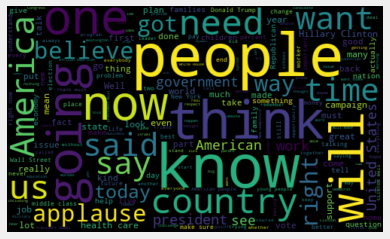

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in campaign['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=80).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

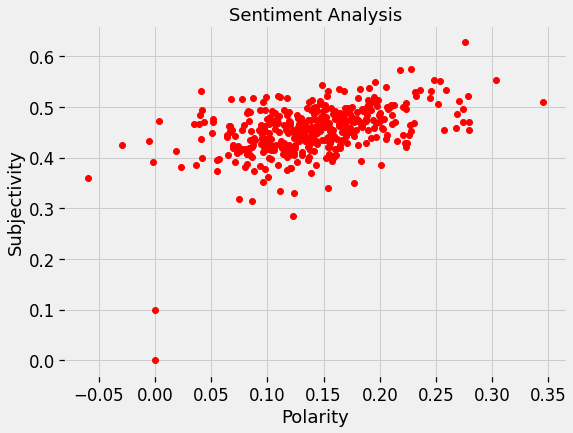

In [ ]:
# Plotting polarity and subjectivity

plt.figure(figsize=(8,6)) 
plt.scatter(campaign["Polarity"], campaign["Subjectivity"], color='Red') 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

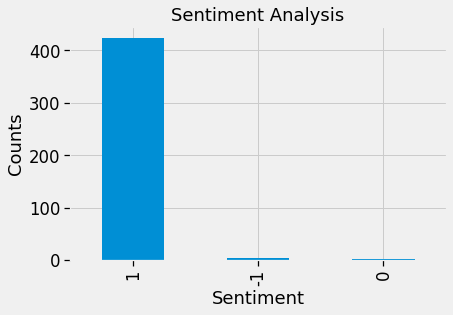

In [ ]:
# Plotting and visualizing the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
campaign['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# final sentiment score aggrgated by candidate 

sentiment_agg = pd.pivot_table(campaign, index = ['Candidate'], aggfunc = 'mean')
sentiment_agg.reset_index(level = ['Candidate'], inplace = True)
sentiment_agg

,Candidate,Cluster,Final_Sentiment,Negative,Neutral,Polarity,Positive,Subjectivity,authority/subversion,avg_sentence_length,...,care/harm,char_count,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation,sentence_count,total_len,total_words,word_count
0,Ben Carson,0.000000,0.0,0,0,0.160154,0,0.526690,0.102743,17.644596,...,0.229565,13446.000000,0.000000,0.078664,0.145289,0.078664,184.000000,13446.000000,2534.500000,2923.000000
1,Bernie Sanders,0.050000,0.0,0,0,0.124630,0,0.456581,0.249612,27.028011,...,0.225785,16471.800000,0.124735,0.039117,0.114917,0.150790,134.000000,16471.800000,2985.316667,3337.700000
2,Bobby Jindal,0.000000,0.0,0,0,0.128541,0,0.447854,0.349786,15.951351,...,0.155461,13976.000000,0.000000,0.000000,0.233191,0.116595,185.000000,13976.000000,2573.000000,2951.000000
3,Carly Fiorina,0.000000,0.0,0,0,-0.060000,0,0.360000,0.543478,66.000000,...,0.000000,1004.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1004.000000,184.000000,198.000000
4,Chris Christie,0.000000,0.0,0,0,0.075821,0,0.508144,0.352694,18.484920,...,0.138866,14689.500000,0.082560,0.000000,0.187574,1.094174,161.500000,14689.500000,2792.500000,3073.000000
5,Donald Trump,0.040541,0.0,0,0,0.102509,0,0.453704,0.440846,47.518099,...,0.188773,18000.000000,0.060778,0.042448,0.059008,0.193221,165.148649,18000.000000,3272.472973,3600.040541
6,George Pataki,0.000000,0.0,0,0,0.098545,0,0.437272,0.504141,30.525773,...,0.180050,15070.000000,0.072020,0.144040,0.036010,0.180050,97.000000,15070.000000,2777.000000,2961.000000
7,Hillary Clinton,0.163265,0.0,0,0,0.156315,0,0.453218,0.349255,22.984024,...,0.326387,18899.678571,0.070440,0.027196,0.152169,0.222756,175.413265,18899.678571,3501.494898,3881.015306
8,Jeb Bush,0.000000,0.0,0,0,0.133101,0,0.456146,0.263235,66.272375,...,0.109633,12969.500000,0.085980,0.006536,0.120090,0.274695,73.166667,12969.500000,2344.333333,2479.333333
9,Jim Webb,0.000000,0.0,0,0,0.159147,0,0.401073,0.264026,806.583333,...,0.242024,47284.000000,0.088009,0.022002,0.000000,0.132013,12.000000,47284.000000,9090.000000,9679.000000


In [ ]:
sentiment_agg.describe()

,Cluster,Final_Sentiment,Negative,Neutral,Polarity,Positive,Subjectivity,authority/subversion,avg_sentence_length,avg_word_length,care/harm,char_count,fairness/cheating,liberty/oppression,loyalty/betrayal,sanctity/degradation,sentence_count,total_len,total_words,word_count
count,21.000000,21.0,21.0,21.0,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.016848,0.0,0.0,0.0,0.126104,0.0,0.450213,0.353922,69.164064,5.016341,0.167110,15902.224647,0.063830,0.039285,0.128788,0.207231,117.827768,15902.224647,2931.326320,3203.851415
std,0.041736,0.0,0.0,0.0,0.054077,0.0,0.034038,0.157611,169.570026,0.213482,0.079453,8394.163493,0.040618,0.034988,0.103593,0.214377,56.764389,8394.163493,1625.222567,1730.984010
min,0.000000,0.0,0.0,0.0,-0.060000,0.0,0.360000,0.102743,15.951351,4.625547,0.000000,1004.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1004.000000,184.000000,198.000000
25%,0.000000,0.0,0.0,0.0,0.102509,0.0,0.437272,0.263235,23.072594,4.866664,0.125500,12969.500000,0.051880,0.017464,0.066362,0.134320,75.187500,12969.500000,2362.000000,2634.300000
50%,0.000000,0.0,0.0,0.0,0.132642,0.0,0.452209,0.326643,27.906981,4.985214,0.155461,14689.500000,0.061744,0.031471,0.114917,0.171948,115.312500,14689.500000,2727.333333,2961.000000
75%,0.000000,0.0,0.0,0.0,0.159147,0.0,0.456146,0.424913,34.086749,5.221132,0.225785,16471.800000,0.082560,0.047594,0.152169,0.193221,161.500000,16471.800000,2985.316667,3337.700000
max,0.163265,0.0,0.0,0.0,0.209317,0.0,0.526690,0.866898,806.583333,5.306098,0.326387,47284.000000,0.159444,0.144040,0.458831,1.094174,228.000000,47284.000000,9090.000000,9679.000000
